### Import Data

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [1]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:51<00:00, 22.9MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.1MB/s]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

### Import Libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import layers, Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [25]:
# generators
# Load and preprocess the data
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',  #for train
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',  #for test
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [26]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [4]:
# Data Augmentation Layer
data_augmentation = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomContrast(0.2),
])

### Define the CNN Model Architecture

In [9]:
model = Sequential()

data_augmentation,  # Add data augmentation here

# Convolutional Layer 1
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# Convolutional Layer 2
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# Convolutional Layer 3
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# Flattening Layer
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

# Output Layer
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

### Compile the Model

In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Train the Model

In [30]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 97ms/step - accuracy: 0.5666 - loss: 2.7785 - val_accuracy: 0.6276 - val_loss: 0.6615
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 94ms/step - accuracy: 0.6459 - loss: 0.6377 - val_accuracy: 0.6062 - val_loss: 0.7650
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 82ms/step - accuracy: 0.7206 - loss: 0.5462 - val_accuracy: 0.6672 - val_loss: 0.6107
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7799 - loss: 0.4611 - val_accuracy: 0.7364 - val_loss: 0.6043
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8208 - loss: 0.3945 - val_accuracy: 0.7910 - val_loss: 0.4572
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.8479 - loss: 0.3416 - val_accuracy: 0.8060 - val_loss: 0.4368
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 86ms/step - accuracy: 0.8704 - loss: 0.2830 - val_accuracy: 0.8220 - val_loss: 0.4478
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 82ms/step - accuracy: 0.8853 - loss: 0.2808 - 

### Evaluate the Model

In [32]:
eval_result = model.evaluate(validation_ds)
print(f'Validation Loss: {eval_result[0]}')
print(f'Validation Accuracy: {eval_result[1]}')

157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.8050 - loss: 0.6581
Validation Loss: 0.66358482837677
Validation Accuracy: 0.8094000220298767


### Save the Model

In [33]:
model.save('cat_dog_classifier_model.h5')

In [34]:
import matplotlib.pyplot as plt

### Plot Training and Validation Metrics

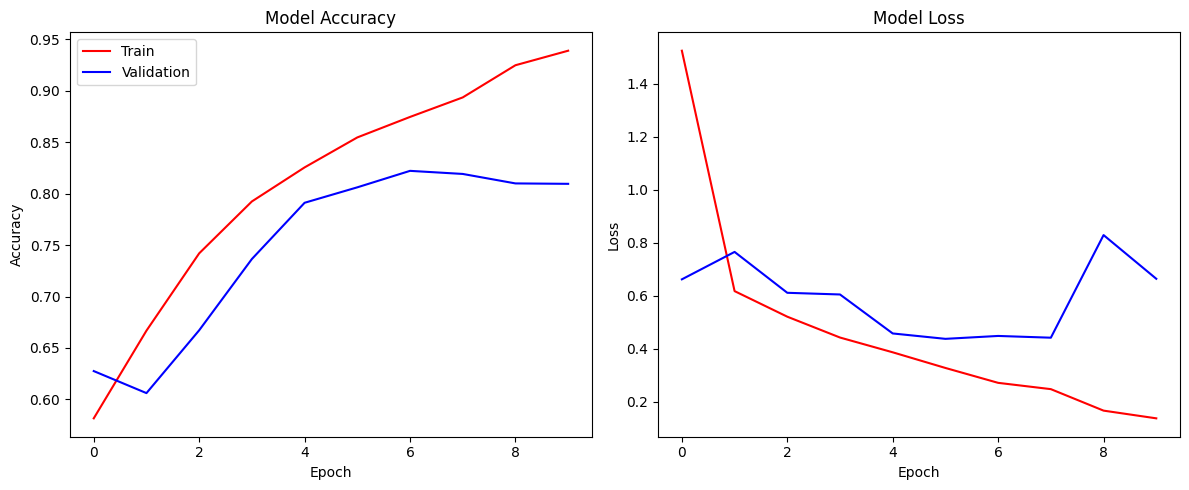

In [35]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],color='red',label='Train')
plt.plot(history.history['val_accuracy'],color='blue',label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],color='red',label='Train')
plt.plot(history.history['val_loss'],color='blue',label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

### Test on Image

Image array shape: (1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predictions: [[0.49729323]]
Predicted class: class1


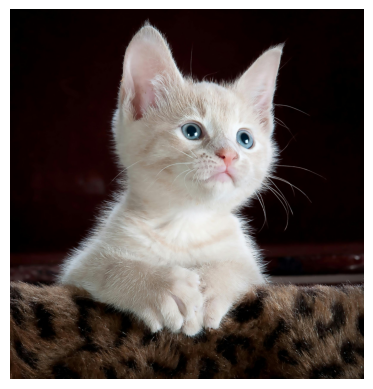

In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size=(256, 256)):
    # Load the image with the target size
    img = image.load_img(img_path, target_size=target_size)
    # Convert the image to a NumPy array
    img_array = image.img_to_array(img)
    # Add batch dimension (the model expects a batch of images)
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize the image if required (0-1 range is common)
    img_array = img_array / 255.0  # Modify this line if different preprocessing is needed
    return img_array

# Path to your image
img_path = '/content/cat_image.jpeg'

# Preprocess the image
img_array = load_and_preprocess_image(img_path, target_size=(256, 256))

# Print the shape of the preprocessed image to confirm
print("Image array shape:", img_array.shape)  # Should be (1, 256, 256, 3)

# Make prediction
predictions = model.predict(img_array)

# Print the predictions
print("Predictions:", predictions)

# If your model is a classification model and you need to decode the predictions
# (Assuming you have class names and it's a classification task)
# Example for classification with class names
class_names = ['class1', 'class2', 'class3']  # Replace with your class names
predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest probability
print(f"Predicted class: {class_names[predicted_class[0]]}")

# Optionally, display the image
img = image.load_img(img_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()
